In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
home_sales_path = "ZHVF_bottom_tier_home_sales.csv"
home_sales_df = pd.read_csv(home_sales_path)

# Set the index of home_sales_df to 'StateName'
home_sales_df = home_sales_df.set_index('StateName')

# Display the data table for preview
home_sales_df.head()


,RegionID,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
StateName,,,,,,,,,,,,,,,,,,,,,
NaN,102001,0,United States,country,58470.686593,58561.701356,58676.557929,58930.415561,59230.846291,59560.900999,...,181159.674990,182251.367506,183205.105409,183938.928903,184483.671183,184898.887299,185160.011410,185381.945529,185870.992228,186968.086967
NY,394913,1,"New York, NY",msa,123245.017642,123728.955568,124202.394718,125184.874928,126214.549544,127363.912495,...,415224.930903,418495.692221,421475.140921,424050.720026,426363.525873,428630.081999,431194.918947,433851.353130,437139.259948,441210.470085
CA,753899,2,"Los Angeles, CA",msa,134374.310197,134775.231648,135403.453974,136651.528364,138068.913406,139461.769071,...,637577.163891,645691.429353,655326.107600,665124.367658,673528.585515,680466.107558,685473.600431,686258.162476,683793.282500,681527.211251
IL,394463,3,"Chicago, IL",msa,77996.767232,78066.913648,78204.234931,78522.160482,78903.861287,79337.087773,...,187594.056394,189327.233969,191128.566340,192673.917402,193963.224583,194888.925175,195552.368344,196045.058751,197093.503033,198809.091805
TX,394514,4,"Dallas, TX",msa,69095.424811,69115.856626,69129.721566,69200.451563,69319.534064,69459.808274,...,259071.335241,259816.527259,260733.258633,261316.866343,261751.695004,261618.803383,261422.875668,261646.134857,262307.338752,263365.654996


In [21]:
# Selecting the desired columns
filtered_df = home_sales_df.loc[:, '2013-01-31':'2023-12-31']

# Resetting the index to keep 'StateName' as a column
filtered_df.reset_index(inplace=True)

# Display the filtered DataFrame
filtered_df.head()


,StateName,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,NaN,79849.397694,80235.039731,80713.967760,81286.107366,82005.465157,82764.504871,83397.672841,84078.475221,84678.000449,...,177524.400508,178491.305017,179826.151193,181159.674990,182251.367506,183205.105409,183938.928903,184483.671183,184898.887299,185160.011410
1,NY,218427.863501,218989.657497,219476.952027,219912.484669,220596.304267,221576.715386,222658.188953,223906.700955,225168.971676,...,405364.373649,407804.697704,411525.338563,415224.930903,418495.692221,421475.140921,424050.720026,426363.525873,428630.081999,431194.918947
2,CA,243207.774597,245854.946696,247335.772271,249444.017911,253113.484675,258161.860237,264109.036194,270714.197596,277912.386528,...,631701.559313,629398.914751,632101.579211,637577.163891,645691.429353,655326.107600,665124.367658,673528.585515,680466.107558,685473.600431
3,IL,83161.913825,83513.206680,83962.051763,84625.945752,85271.814193,86234.377351,87051.489817,88106.636603,89117.226855,...,182908.137316,184289.758638,185888.597268,187594.056394,189327.233969,191128.566340,192673.917402,193963.224583,194888.925175,195552.368344
4,TX,82788.919433,83342.587566,83943.554348,84540.211621,85372.796983,86411.499625,87430.620070,88320.969560,89035.386819,...,258179.949406,257946.844350,258368.004734,259071.335241,259816.527259,260733.258633,261316.866343,261751.695004,261618.803383,261422.875668


In [22]:
# Drop rows with NaN values in the 'StateName' column
filtered_df = filtered_df.dropna(subset=['StateName'])

# Identify duplicate rows based on the 'StateName' column
duplicate_states = filtered_df[filtered_df.duplicated(subset=['StateName'], keep=False)]

# Display duplicate rows
print("Duplicate Rows based on StateName column:")
duplicate_states.head()



Duplicate Rows based on StateName column:


,StateName,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
1,NY,218427.863501,218989.657497,219476.952027,219912.484669,220596.304267,221576.715386,222658.188953,223906.700955,225168.971676,...,405364.373649,407804.697704,411525.338563,415224.930903,418495.692221,421475.140921,424050.720026,426363.525873,428630.081999,431194.918947
2,CA,243207.774597,245854.946696,247335.772271,249444.017911,253113.484675,258161.860237,264109.036194,270714.197596,277912.386528,...,631701.559313,629398.914751,632101.579211,637577.163891,645691.429353,655326.107600,665124.367658,673528.585515,680466.107558,685473.600431
3,IL,83161.913825,83513.206680,83962.051763,84625.945752,85271.814193,86234.377351,87051.489817,88106.636603,89117.226855,...,182908.137316,184289.758638,185888.597268,187594.056394,189327.233969,191128.566340,192673.917402,193963.224583,194888.925175,195552.368344
4,TX,82788.919433,83342.587566,83943.554348,84540.211621,85372.796983,86411.499625,87430.620070,88320.969560,89035.386819,...,258179.949406,257946.844350,258368.004734,259071.335241,259816.527259,260733.258633,261316.866343,261751.695004,261618.803383,261422.875668
5,TX,82377.718434,82653.624167,83157.859412,83797.812606,84700.697371,85727.993224,86744.827059,87769.710631,88551.590515,...,211821.073179,211767.978372,212208.627757,212967.642968,213662.268165,214349.764941,214653.778635,214810.852234,214719.043562,214659.913838


In [23]:
# Group by 'StateName' and aggregate by taking the median across each column
combined_df = duplicate_states.groupby('StateName').median().reset_index()

# Display the combined DataFrame
combined_df.head()



,StateName,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,AK,153862.486524,153477.348027,152971.034000,152909.957336,153173.453152,153708.618806,153930.118487,154338.882088,154647.365253,...,233958.159142,234295.308099,235108.291628,236444.219669,237859.704208,238981.130836,239264.316395,238794.505953,238158.840549,237385.416066
1,AL,63648.903482,63828.182125,64383.718794,64915.083753,65339.675290,65917.042225,66723.577411,67757.290112,68053.306580,...,100758.457904,102647.956329,104849.537184,106089.877292,106736.045271,106642.770112,106744.566668,106448.527794,106488.195946,106478.552270
2,AR,56282.391487,56319.727395,56487.450873,56571.151549,56466.373089,56309.399950,56337.445355,56758.435038,57173.585808,...,90179.050163,91192.722995,92836.474659,93780.137434,94011.848114,93517.670415,93241.932089,92897.624056,92626.000458,92087.058474
3,AZ,88128.203919,88041.056284,87916.962646,88741.573643,90158.513899,91471.418001,92035.109635,92275.742422,93011.307954,...,216306.716486,216099.900601,216648.495121,217983.772657,219366.392589,220682.290717,221624.145917,222129.422466,222464.025946,222771.622003
4,CA,128229.856953,130536.084354,132807.180795,135670.092998,139504.516730,143872.297563,147985.323900,152252.616481,156605.778521,...,371376.608884,371591.546558,373215.072428,375219.587509,377710.513648,380298.053067,380686.466367,380182.645307,380220.596043,379888.471169


In [24]:
# Unpivot the DataFrame to have each date as a separate row
combined_df_unpivoted = pd.melt(combined_df, id_vars=['StateName'], var_name='Date', value_name='MedianHomePrice')

# Convert the 'Date' column to datetime format
combined_df_unpivoted['Date'] = pd.to_datetime(combined_df_unpivoted['Date'])

# Extract the year from the 'Date' column
combined_df_unpivoted['Year'] = combined_df_unpivoted['Date'].dt.year

# Group by 'StateName' and 'Year' and aggregate the median home prices
combined_df_yearly = combined_df_unpivoted.groupby(['StateName', 'Year']).median().reset_index()

# Pivot the DataFrame to have each year as a separate column
combined_df_pivoted = combined_df_yearly.pivot(index='StateName', columns='Year', values='MedianHomePrice').reset_index()

# Display the pivoted DataFrame
combined_df_pivoted.head()




Year,StateName,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,153896.302506,156725.426357,165330.524698,171307.240200,172837.940044,178971.270282,189994.282551,199405.105452,211695.872458,229143.085764,236914.817868
1,AL,66320.309818,70735.132782,70863.971519,73021.844082,71914.032041,73474.633550,75908.773281,80997.924258,96607.407579,104054.068594,106269.202543
2,AR,56529.301211,57415.958054,61130.918784,64997.813930,65878.187432,68694.739898,71726.067419,76319.607275,85516.190947,92577.233989,92731.237558
3,AZ,91753.263818,100521.974866,108074.978531,113145.812866,119449.520156,129297.288211,145830.074904,157127.758966,192989.297828,223364.706902,218959.001952
4,CA,145928.810731,178624.265303,191569.123614,201004.683907,224169.437190,254504.179975,268025.385556,283491.399069,337891.092708,386781.219589,377460.825441


In [25]:
combined_df_pivoted.dtypes


Year
StateName     object
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
2018         float64
2019         float64
2020         float64
2021         float64
2022         float64
2023         float64
dtype: object

In [26]:
# Convert each year's median home price to numerical values
for year in combined_df_pivoted.columns[1:]:
    combined_df_pivoted[year] = combined_df_pivoted[year].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Display the DataFrame with median home prices as numerical values
combined_df_pivoted.head()


Year,StateName,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,153896.302506,156725.426357,165330.524698,171307.240200,172837.940044,178971.270282,189994.282551,199405.105452,211695.872458,229143.085764,236914.817868
1,AL,66320.309818,70735.132782,70863.971519,73021.844082,71914.032041,73474.633550,75908.773281,80997.924258,96607.407579,104054.068594,106269.202543
2,AR,56529.301211,57415.958054,61130.918784,64997.813930,65878.187432,68694.739898,71726.067419,76319.607275,85516.190947,92577.233989,92731.237558
3,AZ,91753.263818,100521.974866,108074.978531,113145.812866,119449.520156,129297.288211,145830.074904,157127.758966,192989.297828,223364.706902,218959.001952
4,CA,145928.810731,178624.265303,191569.123614,201004.683907,224169.437190,254504.179975,268025.385556,283491.399069,337891.092708,386781.219589,377460.825441


In [27]:
# Round each year's median home price to the nearest whole number
for year in combined_df_pivoted.columns[1:]:
    combined_df_pivoted[year] = combined_df_pivoted[year].round()

# Display the DataFrame with rounded median home prices
combined_df_pivoted.head()


Year,StateName,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,153896.0,156725.0,165331.0,171307.0,172838.0,178971.0,189994.0,199405.0,211696.0,229143.0,236915.0
1,AL,66320.0,70735.0,70864.0,73022.0,71914.0,73475.0,75909.0,80998.0,96607.0,104054.0,106269.0
2,AR,56529.0,57416.0,61131.0,64998.0,65878.0,68695.0,71726.0,76320.0,85516.0,92577.0,92731.0
3,AZ,91753.0,100522.0,108075.0,113146.0,119450.0,129297.0,145830.0,157128.0,192989.0,223365.0,218959.0
4,CA,145929.0,178624.0,191569.0,201005.0,224169.0,254504.0,268025.0,283491.0,337891.0,386781.0,377461.0


In [28]:
import os

# Check if the directory exists, if not, create it
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the Rental into a csv
combined_df_pivoted.to_csv(f"{output_dir}/home_prices_by_state.csv")

combined_df_pivoted.head()

Year,StateName,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,153896.0,156725.0,165331.0,171307.0,172838.0,178971.0,189994.0,199405.0,211696.0,229143.0,236915.0
1,AL,66320.0,70735.0,70864.0,73022.0,71914.0,73475.0,75909.0,80998.0,96607.0,104054.0,106269.0
2,AR,56529.0,57416.0,61131.0,64998.0,65878.0,68695.0,71726.0,76320.0,85516.0,92577.0,92731.0
3,AZ,91753.0,100522.0,108075.0,113146.0,119450.0,129297.0,145830.0,157128.0,192989.0,223365.0,218959.0
4,CA,145929.0,178624.0,191569.0,201005.0,224169.0,254504.0,268025.0,283491.0,337891.0,386781.0,377461.0


In [29]:
# Calculate the increase in home prices from 2013 to 2023
combined_df_pivoted['Increase'] = combined_df_pivoted[2023] - combined_df_pivoted[2013]

# Sort the StateNames based on the increase in home prices
sorted_df = combined_df_pivoted.sort_values(by='Increase', ascending=False)

# Select the top 3 StateNames with the highest increase
top_3_state_names = sorted_df.head(3)['StateName'].tolist()

# Display the top 3 StateNames with the highest increase
print("Top 3 StateNames with the highest increase in home prices:")
for state_name in top_3_state_names:
    print(state_name)


Top 3 StateNames with the highest increase in home prices:
HI
UT
CO


In [30]:
# Calculate the increase in home prices from 2013 to 2023
combined_df_pivoted['Increase'] = combined_df_pivoted[2023] - combined_df_pivoted[2013]

# Sort the StateNames based on the increase in home prices in ascending order
sorted_df_lowest = combined_df_pivoted.sort_values(by='Increase', ascending=True)

# Select the bottom 3 StateNames with the lowest increase
lowest_3_state_names = sorted_df_lowest.head(3)['StateName'].tolist()

# Display the bottom 3 StateNames with the lowest increase
print("Bottom 3 StateNames with the lowest increase in home prices:")
for state_name in lowest_3_state_names:
    print(state_name)


Bottom 3 StateNames with the lowest increase in home prices:
LA
ND
IL


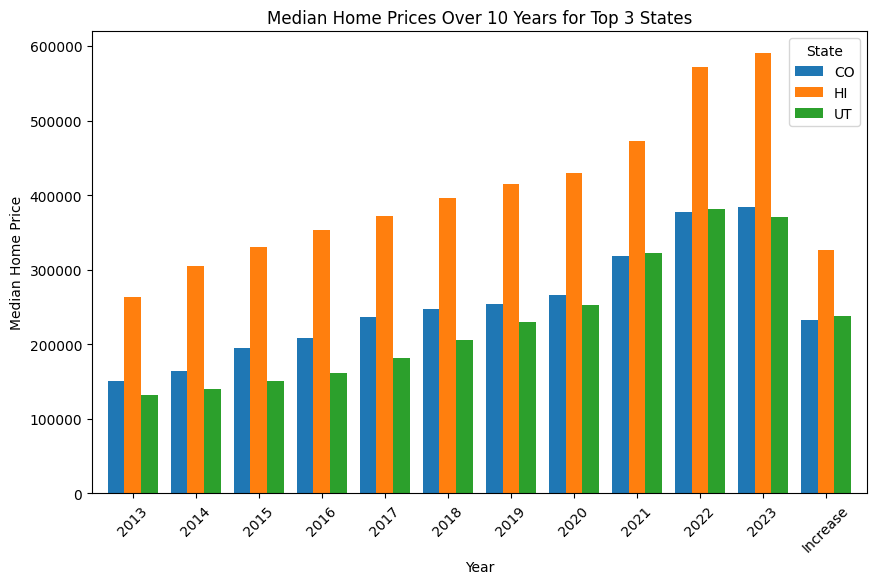

In [31]:
# Filter the DataFrame to include only the data for the top 3 states (HI, UT, CO)
top_3_states_data = combined_df_pivoted[combined_df_pivoted['StateName'].isin(['HI', 'UT', 'CO'])]

# Set the StateName column as the index
top_3_states_data.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_data = top_3_states_data.transpose()

# Plot the data using a grouped bar plot
ax = transposed_data.plot(kind='bar', figsize=(10, 6), width=0.8)

# Set the title and labels
plt.title('Median Home Prices Over 10 Years for Top 3 States')
plt.xlabel('Year')
plt.ylabel('Median Home Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='State')
plt.show()



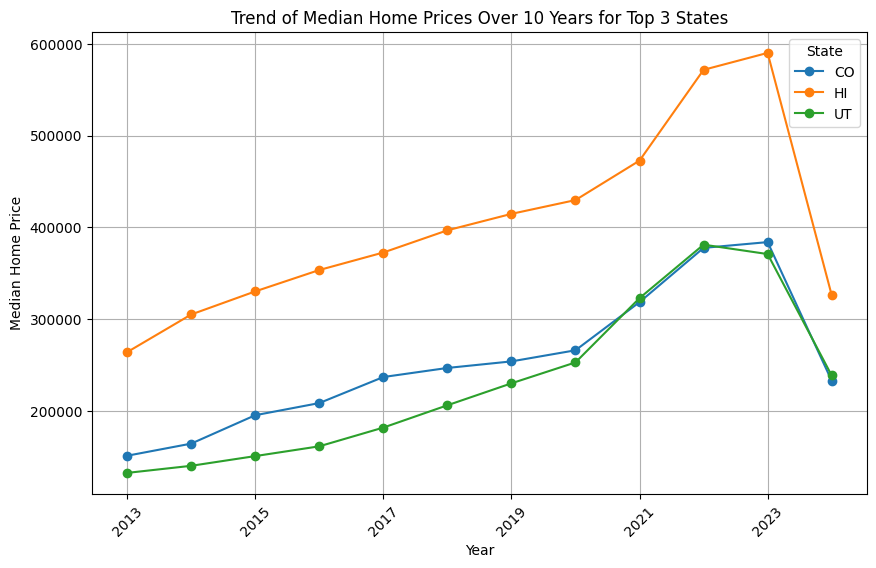

In [37]:
# Filter the DataFrame to include only the data for the top 3 states (HI, UT, CO)
top_3_states_data = combined_df_pivoted[combined_df_pivoted['StateName'].isin(['HI', 'UT', 'CO'])]

# Set the StateName column as the index
top_3_states_data.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_data = top_3_states_data.transpose()

# Plot the data using a line plot
ax = transposed_data.plot(kind='line', figsize=(10, 6), marker='o')

# Set the title and labels
plt.title('Trend of Median Home Prices Over 10 Years for Top 3 States')
plt.xlabel('Year')
plt.ylabel('Median Home Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='State')
plt.grid(True)
plt.show()


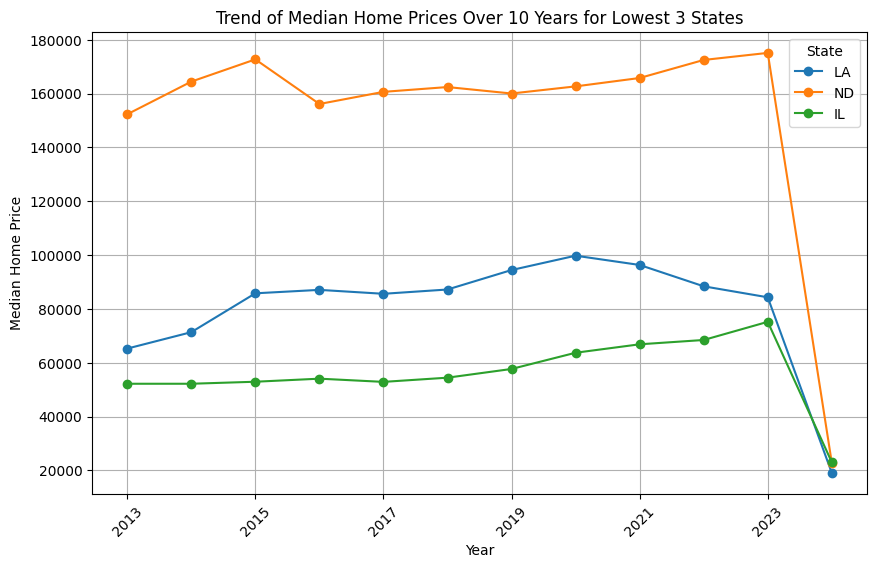

In [33]:
# Sort the DataFrame by the increase in median home prices in ascending order
sorted_df_lowest = combined_df_pivoted.sort_values(by='Increase', ascending=True)

# Select the lowest 3 states
lowest_3_states_data = sorted_df_lowest.head(3)

# Set the StateName column as the index
lowest_3_states_data.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_data_lowest = lowest_3_states_data.transpose()

# Plot the data using a line plot
ax = transposed_data_lowest.plot(kind='line', figsize=(10, 6), marker='o')

# Set the title and labels
plt.title('Trend of Median Home Prices Over 10 Years for Lowest 3 States')
plt.xlabel('Year')
plt.ylabel('Median Home Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='State')
plt.grid(True)
plt.show()


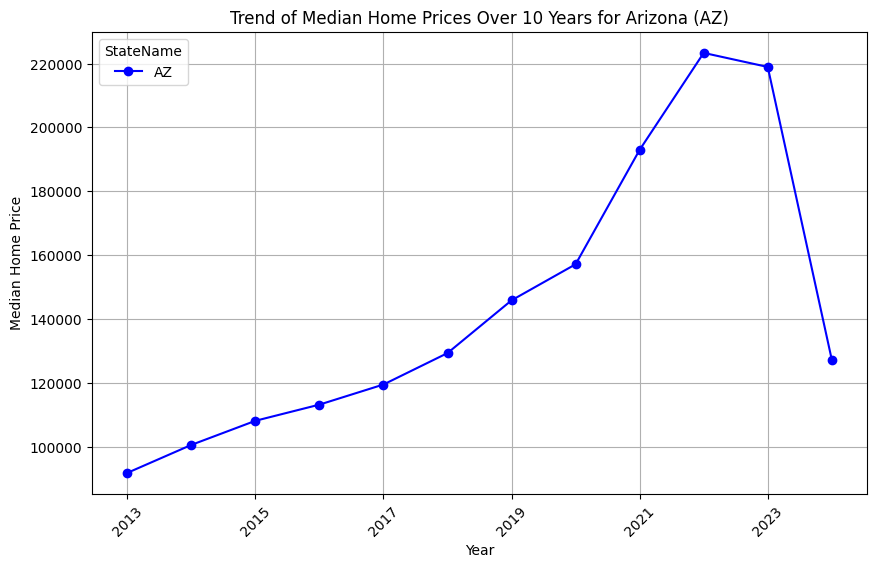

In [34]:
# Filter the DataFrame to include only data for the state of Arizona (AZ)
az_data = combined_df_pivoted[combined_df_pivoted['StateName'] == 'AZ']

# Set the 'StateName' column as the index
az_data.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_az_data = az_data.transpose()

# Plot the data using a line plot
ax = transposed_az_data.plot(kind='line', figsize=(10, 6), marker='o', color='b')

# Set the title and labels
plt.title('Trend of Median Home Prices Over 10 Years for Arizona (AZ)')
plt.xlabel('Year')
plt.ylabel('Median Home Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()



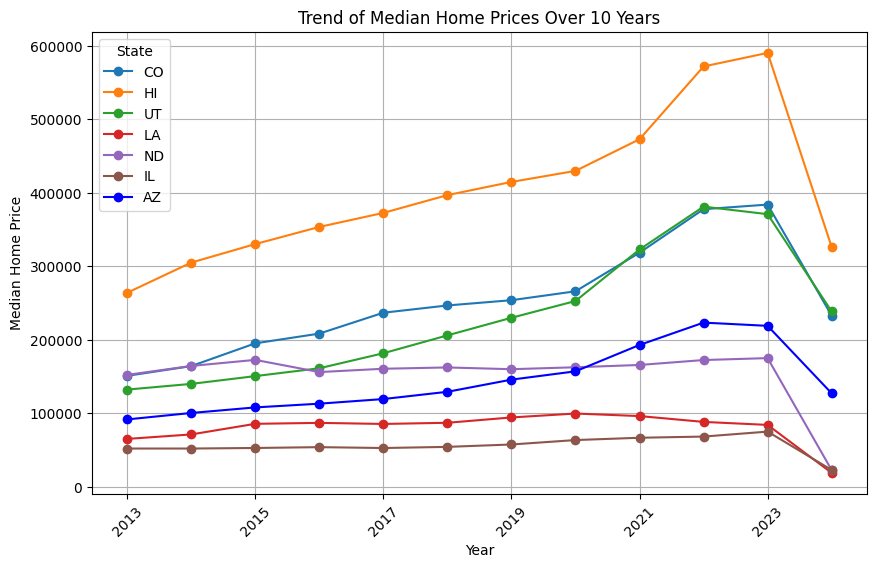

In [35]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data for the top 3 states
transposed_data.plot(kind='line', marker='o', ax=ax, label='Top 3 States')

# Plot the data for the lowest 3 states
transposed_data_lowest.plot(kind='line', marker='o', ax=ax, label='Lowest 3 States')

# Plot the data for Arizona (AZ)
transposed_az_data.plot(kind='line', marker='o', ax=ax, color='b', label='AZ')

# Set the title and labels
plt.title('Trend of Median Home Prices Over 10 Years')
plt.xlabel('Year')
plt.ylabel('Median Home Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='State')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

